In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_train='/content/drive/MyDrive/Nature_park_photos/test_dataset_altai_test/dataset/1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/MyDrive/Nature_park_photos/train_dataset_altai/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import necessary modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [13]:
#Применение на всех 258 фото - ВСПЫШКА / GLARE DETECTION жжжжж

lstclassification1 = []
stclass = []
lstpredictions = []
from PIL import ImageFile
import pandas as pd

glareCNN = tf.keras.models.load_model(path1+'/glare_detect.h5')
def glare(img_path,img_name):

    test_image1 = tf.keras.preprocessing.image.load_img(str(img_path)+str(img_name),target_size = (64,64))
    test_image2 = tf.keras.preprocessing.image.img_to_array(test_image1)
    test_image2 = np.expand_dims(test_image2, axis = 0)
    result = glareCNN.predict(test_image2/255)
    return test_image1,result

def predd(score):
    pred_class = ""
    if score[0][0] <0.04: #lowered to 4% as animals during night also displayed as white spot and this distorts analysis
        pred_class = "1"
    else:
        pred_class = "0"
    return pred_class


grade = {'Вспышка':[], 'Оценка': [], 'Наименование': []}

for i in range(0,(len(os.listdir(path_train)))):
    df2,df1 = glare(path_train+'/',os.listdir(path_train)[i])
    lstclassification = predd(df1)
    grade['Вспышка'].append(lstclassification)
    grade['Оценка'].append(df1)
    grade['Наименование'].append(str(os.listdir(path_train)[i]).lower())
    df_glare = pd.DataFrame(grade, columns = ['Вспышка','Оценка','Наименование'])


1/1 [==============================] - 0s 44ms/step


In [47]:
df_glare = df_glare.rename(columns={'Вспышка': 'glare', 'Оценка': 'Score_glare', 'Наименование': 'filename'})
df_glare
#eg. photos 10,11,12 were ccorrectly identified

,glare,Score_glare,filename
0,0,[[0.08472132]],pict0050.jpg
1,0,[[0.4277338]],pict0041.jpg
2,0,[[0.20097649]],pict0038.jpg
3,0,[[0.11958831]],pict0037.jpg
4,0,[[0.2482086]],pict0159.jpg
...,...,...,...
253,0,[[0.9047476]],pict0226.jpg
254,0,[[0.57809]],pict0060.jpg
255,0,[[0.881924]],pict0144.jpg
256,0,[[0.88504523]],pict0194.jpg


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_glare, *['glare'], **{})
chart

In [17]:
#Применение на всех 258 фото - РАЗМЫТИЕ / BLUR  DETECTION жжжжж


total_2 = {'Размытие':[], 'Оценка': [], 'Наименование': []}
trained_model = load_model(path1+'/blur_detect.h5')
from PIL import ImageFile
import pandas as pd
pred = []
pred2=[]
score = []

source_dir = path_train
for i in range(0,(len(os.listdir(path_train)))):
    img = tf.keras.preprocessing.image.load_img(source_dir+'/'+os.listdir(path_train)[i],target_size = (128,128))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = trained_model.predict(x/255) #255 RGB
    classes2=np.array(classes)
    pred.append(img)
    score.append(classes)
    if classes[0][0]<0.5:
        pred1="1"
        total_2['Размытие'].append(pred1)
        total_2['Оценка'].append(np.squeeze(classes2,axis=1))
        total_2['Наименование'].append(str(os.listdir(path_train)[i]).lower())
        k+=1
    else:
        pred1="0"
        total_2['Размытие'].append(pred1)
        total_2['Оценка'].append(np.squeeze(classes2,axis=1))
        total_2['Наименование'].append(str(os.listdir(path_train)[i]).lower())


df_blur = pd.DataFrame(total_2, columns = ['Размытие','Оценка','Наименование'])

1/1 [==============================] - 0s 37ms/step


In [46]:
#Размытые определены правильно, например фото 37,38,43-54
#Некоторые из  размеченных как "размытые"  в тренировочном датасете- определены как чистые,что подтверждает, то
#что предварительный анализ может  быть с ошибками (размеченный вручную)
df_blur = df_blur.rename(columns={'Размытие': 'blur', 'Оценка': 'Score_blur','Наименование': 'filename'})
df_blur

,blur,Score_blur,filename
0,1,[0.051278297],pict0050.jpg
1,0,[0.97369605],pict0041.jpg
2,1,[0.47778288],pict0038.jpg
3,1,[0.4214171],pict0037.jpg
4,1,[0.2506807],pict0159.jpg
...,...,...,...
253,0,[0.9933894],pict0226.jpg
254,0,[0.9894407],pict0060.jpg
255,0,[0.92122513],pict0144.jpg
256,0,[0.96669424],pict0194.jpg


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_blur, *['blur'], **{})
chart

Введите_наименование:pict0054
1/1 [==============================] - 0s 36ms/step


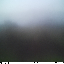

In [26]:
img_path = path_train +'/' #e.g. 1
img = str(input('Введите_наименование:')).upper() +'.JPG'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [31]:
#Применение на всех 258 фото - ТЕМНО / DARK PHOTO DETECTION

classification_dark=''
from PIL import ImageFile
import pandas as pd
import cv2
import sys
import numpy as np
directory = path_train
i=0
grade3 = {'Темно':[], 'Оценка': [], 'Наименование': []}
for pic in os.listdir(directory):

    im = cv2.imread(path_train+'/'+pic, cv2.IMREAD_GRAYSCALE)

    meanpercent = np.mean(im) * 100 / 255  # mean brightness
    if meanpercent < 21: # needed to be increased to 21% after comparing results to actual dataset
      classification_dark = "1"
      grade3['Темно'].append(classification_dark)
      grade3['Оценка'].append(meanpercent)
      grade3['Наименование'].append(str(os.listdir(path_train)[i]).lower())
      i+=1
    else:
      classification_dark = "0"
      grade3['Темно'].append(classification_dark)
      grade3['Оценка'].append(meanpercent)
      grade3['Наименование'].append(str(os.listdir(path_train)[i]).lower())
      i+=1

df_dark = pd.DataFrame(grade3, columns = ['Темно','Оценка','Наименование'])



In [45]:

df_dark= df_dark.rename(columns={'Оценка': 'Score_dark','Темно': 'dark','Наименование': 'filename'})
df_dark

,dark,Score_dark,filename
0,0,66.335534,pict0050.jpg
1,1,20.765290,pict0041.jpg
2,0,31.361134,pict0038.jpg
3,0,32.621552,pict0037.jpg
4,0,25.684400,pict0159.jpg
...,...,...,...
253,0,64.207756,pict0226.jpg
254,0,41.378755,pict0060.jpg
255,1,17.950533,pict0144.jpg
256,0,49.305204,pict0194.jpg


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_dark, *['Score_dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_dark, *['Score_dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_dark, *['dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_dark, *['Score_dark', 'dark'], **{'inner': 'stick'})
chart

In [33]:
df_final = df_blur.copy() #save copy

In [34]:
#merge
df_final=df_final.merge(df_dark,right_on='filename', left_on='filename')
column_to_add=df_final["filename"]
df_final

,blur,Score_blur,filename,dark,Score_dark
0,1,[0.051278297],pict0050.jpg,0,66.335534
1,0,[0.97369605],pict0041.jpg,1,20.765290
2,1,[0.47778288],pict0038.jpg,0,31.361134
3,1,[0.4214171],pict0037.jpg,0,32.621552
4,1,[0.2506807],pict0159.jpg,0,25.684400
...,...,...,...,...,...
253,0,[0.9933894],pict0226.jpg,0,64.207756
254,0,[0.9894407],pict0060.jpg,0,41.378755
255,0,[0.92122513],pict0144.jpg,1,17.950533
256,0,[0.96669424],pict0194.jpg,0,49.305204


In [35]:
#moving column
column_to_move = df_final.pop("filename")
df_final

,blur,Score_blur,dark,Score_dark
0,1,[0.051278297],0,66.335534
1,0,[0.97369605],1,20.765290
2,1,[0.47778288],0,31.361134
3,1,[0.4214171],0,32.621552
4,1,[0.2506807],0,25.684400
...,...,...,...,...
253,0,[0.9933894],0,64.207756
254,0,[0.9894407],0,41.378755
255,0,[0.92122513],1,17.950533
256,0,[0.96669424],0,49.305204


In [36]:
df_final.insert(4, 'filename',column_to_add)

In [37]:
df_final

,blur,Score_blur,dark,Score_dark,filename
0,1,[0.051278297],0,66.335534,pict0050.jpg
1,0,[0.97369605],1,20.765290,pict0041.jpg
2,1,[0.47778288],0,31.361134,pict0038.jpg
3,1,[0.4214171],0,32.621552,pict0037.jpg
4,1,[0.2506807],0,25.684400,pict0159.jpg
...,...,...,...,...,...
253,0,[0.9933894],0,64.207756,pict0226.jpg
254,0,[0.9894407],0,41.378755,pict0060.jpg
255,0,[0.92122513],1,17.950533,pict0144.jpg
256,0,[0.96669424],0,49.305204,pict0194.jpg


In [38]:
dt= df_final.copy()

In [40]:
#merge all
dt=dt.merge(df_glare,right_on='filename',left_on='filename')

In [41]:
dt

,blur,Score_blur,dark,Score_dark,filename,glare,Score_glare
0,1,[0.051278297],0,66.335534,pict0050.jpg,0,[[0.08472132]]
1,0,[0.97369605],1,20.765290,pict0041.jpg,0,[[0.4277338]]
2,1,[0.47778288],0,31.361134,pict0038.jpg,0,[[0.20097649]]
3,1,[0.4214171],0,32.621552,pict0037.jpg,0,[[0.11958831]]
4,1,[0.2506807],0,25.684400,pict0159.jpg,0,[[0.2482086]]
...,...,...,...,...,...,...,...
253,0,[0.9933894],0,64.207756,pict0226.jpg,0,[[0.9047476]]
254,0,[0.9894407],0,41.378755,pict0060.jpg,0,[[0.57809]]
255,0,[0.92122513],1,17.950533,pict0144.jpg,0,[[0.881924]]
256,0,[0.96669424],0,49.305204,pict0194.jpg,0,[[0.88504523]]


In [42]:
# add broken photo column, and set 1 provided that one of three niose is also positive (1)
import numpy as np
dt['broken'] = np.where((dt['blur'] == '1') | (dt['glare'] == '1') | (dt['dark'] == '1'), 1, 0)
dt

,blur,Score_blur,dark,Score_dark,filename,glare,Score_glare,broken
0,1,[0.051278297],0,66.335534,pict0050.jpg,0,[[0.08472132]],1
1,0,[0.97369605],1,20.765290,pict0041.jpg,0,[[0.4277338]],1
2,1,[0.47778288],0,31.361134,pict0038.jpg,0,[[0.20097649]],1
3,1,[0.4214171],0,32.621552,pict0037.jpg,0,[[0.11958831]],1
4,1,[0.2506807],0,25.684400,pict0159.jpg,0,[[0.2482086]],1
...,...,...,...,...,...,...,...,...
253,0,[0.9933894],0,64.207756,pict0226.jpg,0,[[0.9047476]],0
254,0,[0.9894407],0,41.378755,pict0060.jpg,0,[[0.57809]],0
255,0,[0.92122513],1,17.950533,pict0144.jpg,0,[[0.881924]],1
256,0,[0.96669424],0,49.305204,pict0194.jpg,0,[[0.88504523]],0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dt, *['Score_dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dt, *['broken'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dt, *['Score_dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dt, *['broken'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dt, *['blur'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dt, *['dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dt, *['glare'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dt, *[[['Score_dark', 'broken']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dt, *['blur', 'dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dt, *['dark', 'glare'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['Score_dark', 'blur'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['Score_dark', 'dark'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['Score_dark', 'glare'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dt, *['broken', 'blur'], **{'inner': 'stick'})
chart

In [43]:
dt.to_csv('dataset_altai.csv', sep=',')

In [44]:

from google.colab import files
files.download('dataset_altai.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>